<a href="https://colab.research.google.com/github/mozhgans/Machine-Learning-Algorithms/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/test.csv')
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [3]:
df.shape

(300, 2)

In [4]:
X=df['x'].values
Y=df['y'].values
n=len(X)
mean_x=np.mean(X)
mean_y=np.mean(Y)

In [5]:
number=0
denom=0
for i in range(n):
    number=number+(X[i]-mean_x)*(Y[i]-mean_y)
    denom=denom+(X[i]-mean_x)**2
    m=number/denom
    c=mean_y-(m*mean_x)
print(m,c)

1.0143353551195182 -0.46181077366119894


In [6]:
y_pred=m*X+c
print(y_pred)

[ 77.64201157  20.83923168  21.85356704  19.82489633  36.05426201
  14.75321955  62.42698124  95.90004796  19.82489633   4.609866
   3.59553065  18.81056097  96.91438332  62.42698124  36.05426201
  14.75321955  65.46998731  13.7388842   87.78536512  69.52732873
  89.81403583  51.26929234  89.81403583  26.92524381  97.92871867
  58.36963982  79.67068228  20.83923168  93.87137725  26.92524381
  99.95738938  30.98258524  33.01125595  80.68501764  27.93957917
  47.21195092  53.29796305  69.52732873  27.93957917  33.01125595
  91.84270654  71.55599944  50.25495698  76.62767622   3.59553065
  37.06859737  70.54166408  68.51299337  40.11160343  35.03992666
  94.88571261  88.79970048  52.28362769  30.98258524  59.38397518
  -0.46181077  39.09726808  64.45565195  69.52732873  57.35530447
  12.72454884  72.57033479  76.62767622  61.41264589  82.71368835
  17.79622562  41.12593879  50.25495698  55.32663376  12.72454884
  46.19761556  12.72454884  79.67068228  53.29796305  14.75321955
  27.9395791

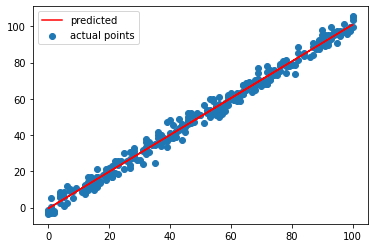

In [7]:
plt.scatter(X,Y,label='actual points')
plt.plot(X,y_pred,c='r',label='predicted')
plt.legend()

In [8]:
ss_t=0
ss_r=0
for i in range(n):
    y_pred=m*X[i]+c
    ss_t=ss_t+(Y[i]-mean_y)**2
    ss_r=ss_r+(Y[i]-y_pred)**2
    r2=1-(ss_r/ss_t)
print(r2)

0.9891203611402716


using sklearn

In [9]:
x=pd.DataFrame(df['x'])
y=df['y']


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [13]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_predict=model.predict(X_test)

In [15]:
y_predict

array([ 40.23980695,  96.08930204,  45.31703378,  15.86911818,
        31.10079866,  28.05446257,  26.02357184,  91.01207522,
        65.62594108,  32.11624403,  58.51782353,  -0.37800766,
        96.08930204,  48.36336987,  50.3942606 ,  23.9926811 ,
        65.62594108,  87.96573912,  63.59505035,  72.73405864,
        17.90000891,  13.83822745,   3.6837738 ,  12.82278209,
        15.86911818,  55.47148743,  52.42515133,  74.76494937,
        44.30158841,  14.85367282,   5.71466453,  78.82673083,
        18.91545428,  28.05446257,  39.22436158,  59.53326889,
        16.88456355,  46.33247914,  96.08930204,  78.82673083,
        73.74950401,  89.99662985,  55.47148743,  91.01207522,
        11.80733672,  64.61049572,  68.67227718,  62.57960499,
        19.93089964,  39.22436158,  41.25525232,  14.85367282,
        56.4869328 ,  22.97723574,  46.33247914,  70.70316791,
        84.91940302,  69.68772254,  19.93089964,  53.4405967 ,
        69.68772254,  69.68772254,  36.17802549, 100.15

In [16]:
from sklearn.metrics import r2_score

In [17]:
score=r2_score(Y_test,y_predict)

In [18]:
score

0.9911400833580252

In [20]:
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


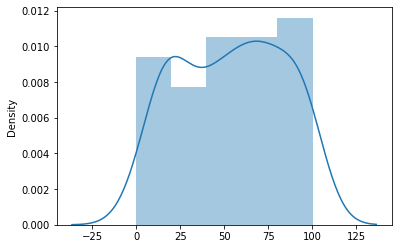

In [21]:
sn.distplot(y_predict)

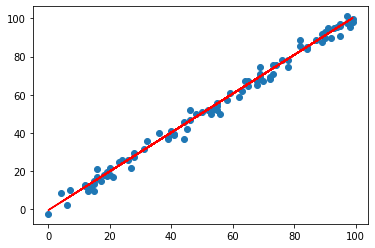

In [22]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,y_predict,c='r')